In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 47s 0us/step


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

In [15]:
%timeit
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
   1/1563 [..............................] - ETA: 7:58 - loss: 2.3017 - accuracy: 0.0938

2023-09-26 18:18:34.727721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 2.0796 - accuracy: 0.2268

2023-09-26 18:18:50.991616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 2.0796 - accuracy: 0.2268 - val_loss: 1.9473 - val_accuracy: 0.2840
Epoch 2/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7904 - accuracy: 0.3438 - val_loss: 1.6327 - val_accuracy: 0.4213
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5190 - accuracy: 0.4618 - val_loss: 1.4142 - val_accuracy: 0.5248
Epoch 4/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2875 - accuracy: 0.5658 - val_loss: 1.2408 - val_accuracy: 0.5800
Epoch 5/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1196 - accuracy: 0.6184 - val_loss: 1.1706 - val_accuracy: 0.5950
Epoch 6/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0066 - accuracy: 0.6544 - val_loss: 1.0847 - val_accuracy: 0.6299
Epoch 7/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9199 - accuracy: 0.6806 - val_loss: 1.0640 - val_accura

313/313 - 1s - loss: 180.2743 - accuracy: 0.4687 - 1s/epoch - 4ms/step


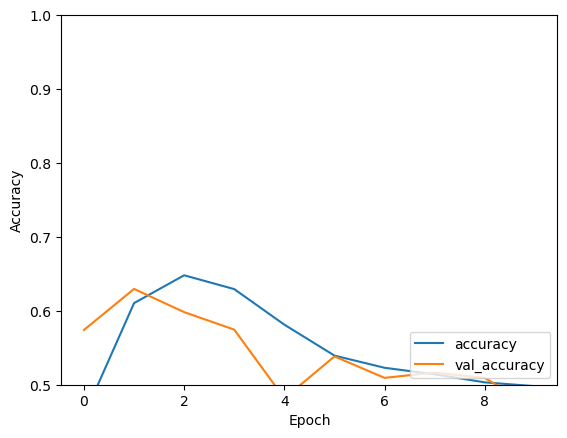

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0560 - accuracy: 0.6423 - 1s/epoch - 4ms/step


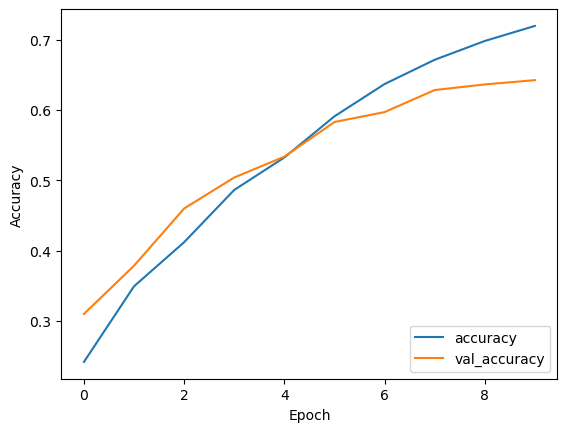

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.3409 - accuracy: 0.6808 - 1s/epoch - 4ms/step


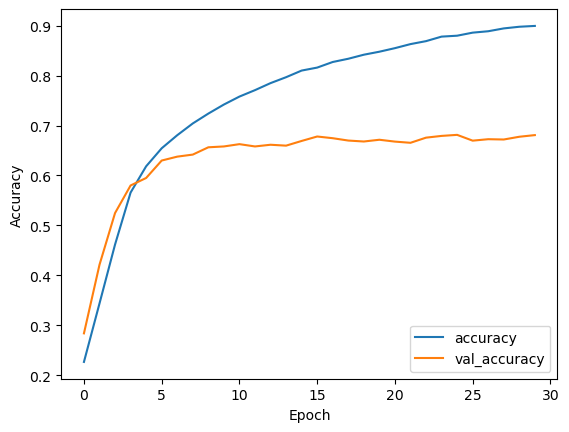

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
print(test_acc)

0.6808000206947327
